# INTRODUCTION / Business Problem

#People travel  a lot these days, so many people settle outside their own countries for jobs. To know good places around their location is always a good idea. Reviews for restaurants, hotels, coffee shops etc. based  on hearsay are not very reliable. Authentic reviews about a restaurant for e.g can be beneficial to a common man to make informed decisions. Such type of information can be also used by business persons to decide whether to build a new business  in a particular area or  not. 
#Having such knowledge before hand can solve a multitude of problems and  save a tonne of money.

In [ ]:
Data used for performing analysis of British columbia and Toronto based restaurants

#Using yellow pages data on restaurants - ratings , reviews , etc. in Bristish columbia (BC) amd Toronto and compare the results and find out which is the better suited place to open  a new restaurant.

#Used parsehub to scrape YELLOW pages data

In [1]:
# The code was removed by Watson Studio for sharing.

,selection1_name,selection1_selection2,Ratings,Extra,Numberofratings,Cuisine
0,Old Mill Toronto Dining Room,M8X 1G5,5.0,The Old Mill Toronto hotel provides elegant lu...,NaN,NaN
1,Bardi's Steak House,M5J 1S8,4.0,"Since 1966, Exceptional Dining, Certified Angu...",172,"Steakhouse, American Cuisine, Extensive Wine L..."
2,D R C Events,M5A 3C4,NaN,NaN,NaN,NaN
3,Sotto Sotto Ristorante,M5R 2H4,4.0,Sotto Sotto brings the romance of Italy to the...,401,"Alternative Contemporay Italian Bistro, Fine D..."
4,Rally Sports Bar,M4A 1W4,4.5,"Located on O'Connor Drive, just south of Eglin...",53,"Sports Bar, American Cuisine, Brunch, Take-out..."


In [2]:

body = client_725fc7dd34ee4ccc85dcf45f8f7b0424.get_object(Bucket='ibmcapstonefinalprojectbattleofne-donotdelete-pr-hrvhcwpyxbtemt',Key='Victoria (BC) restaurants from yellowpages.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,selection1_name,selection1_selection2,selection1_selection3,selection1_selection4,selection1_selection5,selection1_selection5_url
0,Wing's Restaurant,V9A 1M1,"Chinese Food, Chinese, Buffet, Take Out & Deli...",rating 2,36.0,https://www.yellowpages.ca/bus/British-Columbi...
1,Ilgreco Pizzaria,V9A 2A5,"Pizzeria, Greek, Pizza Delivery, Take-out, Res...",rating 3.5,143.0,https://www.yellowpages.ca/bus/British-Columbi...
2,Lum's Chinese Restaurant,V9A 3M6,"Bistro, Chinese",rating 3.5,60.0,https://www.yellowpages.ca/bus/British-Columbi...
3,Mad Greeks Pizzza,V9B 2X4,"Canadian, Greek, Casual",rating 4,NaN,NaN
4,Young's Restaurant,V8T 4E4,"Asian, Chinese",rating 4.5,25.0,https://www.yellowpages.ca/bus/British-Columbi...


#dftor has raw toronto data and dfvic has raw BC data

In [3]:
dftor = df_data_1

In [4]:
dfvic = df_data_2

In [5]:
dftor.head()

,selection1_name,selection1_selection2,Ratings,Extra,Numberofratings,Cuisine
0,Old Mill Toronto Dining Room,M8X 1G5,5.0,The Old Mill Toronto hotel provides elegant lu...,NaN,NaN
1,Bardi's Steak House,M5J 1S8,4.0,"Since 1966, Exceptional Dining, Certified Angu...",172,"Steakhouse, American Cuisine, Extensive Wine L..."
2,D R C Events,M5A 3C4,NaN,NaN,NaN,NaN
3,Sotto Sotto Ristorante,M5R 2H4,4.0,Sotto Sotto brings the romance of Italy to the...,401,"Alternative Contemporay Italian Bistro, Fine D..."
4,Rally Sports Bar,M4A 1W4,4.5,"Located on O'Connor Drive, just south of Eglin...",53,"Sports Bar, American Cuisine, Brunch, Take-out..."


In [5]:
dftor = dftor.rename(columns = {'selection1_name' : 'restaurant', 'selection1_selection2' : 'postalcode'})

In [7]:
dftor.head()

,restaurant,postalcode,Ratings,Extra,Numberofratings,Cuisine
0,Old Mill Toronto Dining Room,M8X 1G5,5.0,The Old Mill Toronto hotel provides elegant lu...,NaN,NaN
1,Bardi's Steak House,M5J 1S8,4.0,"Since 1966, Exceptional Dining, Certified Angu...",172,"Steakhouse, American Cuisine, Extensive Wine L..."
2,D R C Events,M5A 3C4,NaN,NaN,NaN,NaN
3,Sotto Sotto Ristorante,M5R 2H4,4.0,Sotto Sotto brings the romance of Italy to the...,401,"Alternative Contemporay Italian Bistro, Fine D..."
4,Rally Sports Bar,M4A 1W4,4.5,"Located on O'Connor Drive, just south of Eglin...",53,"Sports Bar, American Cuisine, Brunch, Take-out..."


In [8]:
dfvic.head(1)

,selection1_name,selection1_selection2,selection1_selection3,selection1_selection4,selection1_selection5,selection1_selection5_url
0,Wing's Restaurant,V9A 1M1,"Chinese Food, Chinese, Buffet, Take Out & Deli...",rating 2,36.0,https://www.yellowpages.ca/bus/British-Columbi...


In [6]:
dfvic = dfvic.rename(columns = {'selection1_name' : 'restaurant', 'selection1_selection2' : 'postalcode', 'selection1_selection3' : 'Cuisine', 'selection1_selection4' : 'Ratings', 'selection1_selection5' :'Numberofratings'})

In [9]:
dfvic.head()

,restaurant,postalcode,Cuisine,Ratings,Numberofratings,selection1_selection5_url
0,Wing's Restaurant,V9A 1M1,"Chinese Food, Chinese, Buffet, Take Out & Deli...",rating 2,36.0,https://www.yellowpages.ca/bus/British-Columbi...
1,Ilgreco Pizzaria,V9A 2A5,"Pizzeria, Greek, Pizza Delivery, Take-out, Res...",rating 3.5,143.0,https://www.yellowpages.ca/bus/British-Columbi...
2,Lum's Chinese Restaurant,V9A 3M6,"Bistro, Chinese",rating 3.5,60.0,https://www.yellowpages.ca/bus/British-Columbi...
3,Mad Greeks Pizzza,V9B 2X4,"Canadian, Greek, Casual",rating 4,NaN,NaN
4,Young's Restaurant,V8T 4E4,"Asian, Chinese",rating 4.5,25.0,https://www.yellowpages.ca/bus/British-Columbi...


In [7]:
dfvic.isna().sum()

restaurant                    0
postalcode                    0
Cuisine                      80
Ratings                      12
Numberofratings              33
selection1_selection5_url    33
dtype: int64

In [12]:
dfvic.shape

(92, 6)

In [8]:
dfvic.drop('selection1_selection5_url', axis = 1, inplace = True)

CLEAN DFVIC (VICTORIA RESTAURANTS DATASTET)

In [110]:
dfvic.head()

,restaurant,postalcode,Cuisine,Ratings,Numberofratings
0,Wing's Restaurant,V9A 1M1,"Chinese Food, Chinese, Buffet, Take Out & Deli...",rating 2,36.0
1,Ilgreco Pizzaria,V9A 2A5,"Pizzeria, Greek, Pizza Delivery, Take-out, Res...",rating 3.5,143.0
2,Lum's Chinese Restaurant,V9A 3M6,"Bistro, Chinese",rating 3.5,60.0
3,Mad Greeks Pizzza,V9B 2X4,"Canadian, Greek, Casual",rating 4,NaN
4,Young's Restaurant,V8T 4E4,"Asian, Chinese",rating 4.5,25.0


In [9]:
dfvic['Ratings'] = dfvic['Ratings'].str.replace('rating ','')

In [112]:
dfvic.head()

,restaurant,postalcode,Cuisine,Ratings,Numberofratings
0,Wing's Restaurant,V9A 1M1,"Chinese Food, Chinese, Buffet, Take Out & Deli...",2,36.0
1,Ilgreco Pizzaria,V9A 2A5,"Pizzeria, Greek, Pizza Delivery, Take-out, Res...",3.5,143.0
2,Lum's Chinese Restaurant,V9A 3M6,"Bistro, Chinese",3.5,60.0
3,Mad Greeks Pizzza,V9B 2X4,"Canadian, Greek, Casual",4,NaN
4,Young's Restaurant,V8T 4E4,"Asian, Chinese",4.5,25.0


In [10]:
import numpy as np
dfvic['Numberofratings'] = dfvic['Numberofratings'].replace(np.nan, dfvic['Numberofratings'].median())

In [114]:
dfvic.head()

,restaurant,postalcode,Cuisine,Ratings,Numberofratings
0,Wing's Restaurant,V9A 1M1,"Chinese Food, Chinese, Buffet, Take Out & Deli...",2,36.0
1,Ilgreco Pizzaria,V9A 2A5,"Pizzeria, Greek, Pizza Delivery, Take-out, Res...",3.5,143.0
2,Lum's Chinese Restaurant,V9A 3M6,"Bistro, Chinese",3.5,60.0
3,Mad Greeks Pizzza,V9B 2X4,"Canadian, Greek, Casual",4,89.0
4,Young's Restaurant,V8T 4E4,"Asian, Chinese",4.5,25.0


In [11]:
dfvic['Numberofratings'] = dfvic['Numberofratings'].astype(int)

In [116]:
dfvic.head()

,restaurant,postalcode,Cuisine,Ratings,Numberofratings
0,Wing's Restaurant,V9A 1M1,"Chinese Food, Chinese, Buffet, Take Out & Deli...",2,36
1,Ilgreco Pizzaria,V9A 2A5,"Pizzeria, Greek, Pizza Delivery, Take-out, Res...",3.5,143
2,Lum's Chinese Restaurant,V9A 3M6,"Bistro, Chinese",3.5,60
3,Mad Greeks Pizzza,V9B 2X4,"Canadian, Greek, Casual",4,89
4,Young's Restaurant,V8T 4E4,"Asian, Chinese",4.5,25


In [12]:
dfvic.isnull().sum()

restaurant          0
postalcode          0
Cuisine            80
Ratings            12
Numberofratings     0
dtype: int64

In [13]:
dfvic['Ratings'] = dfvic['Ratings'].replace(np.nan, dfvic['Ratings'].median())

In [14]:
dftor['Cuisine'].isnull().sum()

316

Initially thoghout of using Cuisine column in bith the neighbpr hoods for anlyising the type of restaurants, but as most of the data is missing for that column in both  datasets , we are dropping it

In [15]:
dfvic.drop(['Cuisine'], axis = 1, inplace = True)

In [16]:
dftor.drop(['Cuisine'], axis = 1, inplace = True)

In [120]:
dfvic.head()

,restaurant,postalcode,Ratings,Numberofratings
0,Wing's Restaurant,V9A 1M1,2,36
1,Ilgreco Pizzaria,V9A 2A5,3.5,143
2,Lum's Chinese Restaurant,V9A 3M6,3.5,60
3,Mad Greeks Pizzza,V9B 2X4,4,89
4,Young's Restaurant,V8T 4E4,4.5,25


Clean postal codes

In [17]:
dfvic['postalcode'] = dfvic['postalcode'].str.replace(' *', '') 

In [122]:
dfvic.head()

,restaurant,postalcode,Ratings,Numberofratings
0,Wing's Restaurant,V9A1M1,2,36
1,Ilgreco Pizzaria,V9A2A5,3.5,143
2,Lum's Chinese Restaurant,V9A3M6,3.5,60
3,Mad Greeks Pizzza,V9B2X4,4,89
4,Young's Restaurant,V8T4E4,4.5,25


In [35]:
dfvic['postalcode'] = [x[0:3] for x in dfvic['postalcode']]

In [36]:
dfvic.head()    #final dataframe

,restaurant,postalcode,Ratings,Numberofratings
0,Wing's Restaurant,V9A,2,36
1,Ilgreco Pizzaria,V9A,3.5,143
2,Lum's Chinese Restaurant,V9A,3.5,60
3,Mad Greeks Pizzza,V9B,4,89
4,Young's Restaurant,V8T,4.5,25


Cleaning dftor dataframe

In [93]:
dftor.head()

,restaurant,postalcode,Ratings,Extra,Numberofratings
0,Old Mill Toronto Dining Room,M8X 1G5,5.0,The Old Mill Toronto hotel provides elegant lu...,NaN
1,Bardi's Steak House,M5J 1S8,4.0,"Since 1966, Exceptional Dining, Certified Angu...",172
2,D R C Events,M5A 3C4,NaN,NaN,NaN
3,Sotto Sotto Ristorante,M5R 2H4,4.0,Sotto Sotto brings the romance of Italy to the...,401
4,Rally Sports Bar,M4A 1W4,4.5,"Located on O'Connor Drive, just south of Eglin...",53


In [18]:
dftor['postalcode'] = [x[0:3] for x in dftor['postalcode']]

In [19]:
dftor['Extra'].isnull().sum()  # keeping this column to create a word map later

50

In [22]:
dftor.dtypes

restaurant          object
postalcode          object
Ratings            float64
Extra               object
Numberofratings     object
dtype: object

In [20]:
dftor['Numberofratings'] = dftor['Numberofratings'].str.replace(',', '')

In [21]:
dftor['Numberofratings'] = dftor['Numberofratings'].fillna(0)

In [22]:
dftor['Numberofratings'] = dftor['Numberofratings'].astype(int)

In [102]:
dfvic.head()

,restaurant,postalcode,Ratings,Numberofratings
0,Wing's Restaurant,V9A,2,36
1,Ilgreco Pizzaria,V9A,3.5,143
2,Lum's Chinese Restaurant,V9A,3.5,60
3,Mad Greeks Pizzza,V9B,4,94
4,Young's Restaurant,V8T,4.5,25


In [126]:
dftor.head() # final dataframe

,restaurant,postalcode,Ratings,Extra,Numberofratings
0,Old Mill Toronto Dining Room,M8X,5.0,The Old Mill Toronto hotel provides elegant lu...,0
1,Bardi's Steak House,M5J,4.0,"Since 1966, Exceptional Dining, Certified Angu...",172
2,D R C Events,M5A,NaN,NaN,0
3,Sotto Sotto Ristorante,M5R,4.0,Sotto Sotto brings the romance of Italy to the...,401
4,Rally Sports Bar,M4A,4.5,"Located on O'Connor Drive, just south of Eglin...",53


In [23]:

body = client_725fc7dd34ee4ccc85dcf45f8f7b0424.get_object(Bucket='ibmcapstonefinalprojectbattleofne-donotdelete-pr-hrvhcwpyxbtemt',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [63]:
dftorcooor = df_data_3 #coordinates of torronto

In [26]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [27]:
!pip install pgeocode

In [28]:
import pgeocode
nomi = pgeocode.Nominatim('ca')
postal_code = "A1B"
location = nomi.query_postal_code(postal_code)
print(location.latitude, location.longitude)

47.5698 -52.7796


In [170]:
a[0]

'V9A'

In [38]:
b= []
c= []
a = dfvic['postalcode']
nomi = pgeocode.Nominatim('ca')
for x in a:
    location = nomi.query_postal_code(x)
    lat = location.latitude
    long = location.longitude
    b.append(lat)
    c.append(long)
    

In [49]:
dict1 = {'lat' : pd.Series([b]), 'long' : pd.Series([c])}

In [96]:
df2 = pd.DataFrame({'lat':b, 'long' : c, 'postalcode' : a})

In [56]:
dfvic.head()

,restaurant,postalcode,Ratings,Numberofratings
0,Wing's Restaurant,V9A,2,36
1,Ilgreco Pizzaria,V9A,3.5,143
2,Lum's Chinese Restaurant,V9A,3.5,60
3,Mad Greeks Pizzza,V9B,4,89
4,Young's Restaurant,V8T,4.5,25


In [99]:
df2.head()

,lat,long,postalcode
0,48.4496,-123.4193,V9A
1,48.4496,-123.4193,V9A
2,48.4496,-123.4193,V9A
3,48.4793,-123.5271,V9B
4,48.4392,-123.3566,V8T


In [100]:
df3 = df2.drop_duplicates()

In [102]:
df3

,lat,long,postalcode
0,48.4496,-123.4193,V9A
3,48.4793,-123.5271,V9B
4,48.4392,-123.3566,V8T
5,48.4777,-123.3658,V8X
7,48.4267,-123.3655,V8W
9,48.4765,-123.3145,V8N
12,48.6496,-123.4026,V8L


In [103]:
dfVIC = pd.merge(dfvic, df3, on = 'postalcode', how = 'outer')

In [104]:
dfVIC.head()

,restaurant,postalcode,Ratings,Numberofratings,lat,long
0,Wing's Restaurant,V9A,2,36,48.4496,-123.4193
1,Ilgreco Pizzaria,V9A,3.5,143,48.4496,-123.4193
2,Lum's Chinese Restaurant,V9A,3.5,60,48.4496,-123.4193
3,Mad Greeks Pizzza,V9B,4,89,48.4793,-123.5271
4,May Gold Village,V9B,4,57,48.4793,-123.5271


In [61]:
dftor.head()

,restaurant,postalcode,Ratings,Extra,Numberofratings
0,Old Mill Toronto Dining Room,M8X,5.0,The Old Mill Toronto hotel provides elegant lu...,0
1,Bardi's Steak House,M5J,4.0,"Since 1966, Exceptional Dining, Certified Angu...",172
2,D R C Events,M5A,NaN,NaN,0
3,Sotto Sotto Ristorante,M5R,4.0,Sotto Sotto brings the romance of Italy to the...,401
4,Rally Sports Bar,M4A,4.5,"Located on O'Connor Drive, just south of Eglin...",53


In [65]:
dftorcooor.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [66]:
dftorcooor.rename(columns = {'Postal Code' : 'postalcode'}, inplace = True)

In [141]:
dfTOR = pd.merge(dftor, dftorcooor, on = 'postalcode')

In [142]:
dfTOR.head() # final dataframes with latitude, longitude data

,restaurant,postalcode,Ratings,Extra,Numberofratings,Latitude,Longitude
0,Old Mill Toronto Dining Room,M8X,5.0,The Old Mill Toronto hotel provides elegant lu...,0,43.653654,-79.506944
1,Bardi's Steak House,M5J,4.0,"Since 1966, Exceptional Dining, Certified Angu...",172,43.640816,-79.381752
2,Ki Restaurant & Lounge,M5J,4.5,"Dishes are meant to be shared, with a sensatio...",513,43.640816,-79.381752
3,Harbour 60 Toronto,M5J,3.5,Harbour Sixty Steak House Our Landmarks restau...,632,43.640816,-79.381752
4,The Bottom Line Restaurant & Bar,M5J,4.0,"Described as a classy sports bar, the financia...",75,43.640816,-79.381752


In [110]:
dfVIC.head()

,restaurant,postalcode,Ratings,Numberofratings,lat,long
0,Wing's Restaurant,V9A,2,36,48.4496,-123.4193
1,Ilgreco Pizzaria,V9A,3.5,143,48.4496,-123.4193
2,Lum's Chinese Restaurant,V9A,3.5,60,48.4496,-123.4193
3,Mad Greeks Pizzza,V9B,4,89,48.4793,-123.5271
4,May Gold Village,V9B,4,57,48.4793,-123.5271


# Exploring Victoria Restaurants

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
dfVIC['restaurant'].nunique()

20

In [105]:
dfVIC.shape

(92, 6)

In [106]:
dfTOR.shape

(384, 7)

In [117]:
dfVIC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 6 columns):
restaurant         92 non-null object
postalcode         92 non-null object
Ratings            92 non-null object
Numberofratings    92 non-null int64
lat                92 non-null float64
long               92 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.5+ KB


In [119]:
dfVIC['Ratings'] = dfVIC['Ratings'].astype(float)

Text(0.5, 1.0, 'Postal code wise ratings of restaurants in Victoria region-British Columbia, Canada')

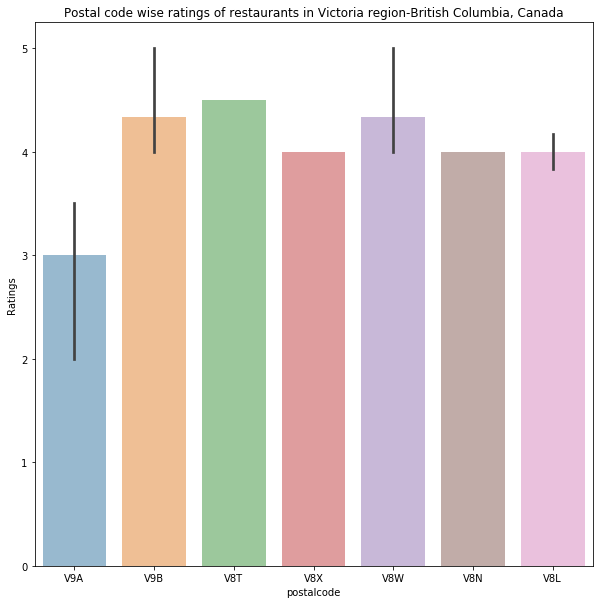

In [135]:
plt.figure(figsize = (10,10))
sns.barplot(y= 'Ratings', x= 'postalcode', data = dfVIC, alpha = 0.5)
plt.title('Postal code wise ratings of restaurants in Victoria region-British Columbia, Canada')

Text(0.5, 1.0, 'Postal code wise number of ratings of restaurants in Victoria region-British Columbia, Canada')

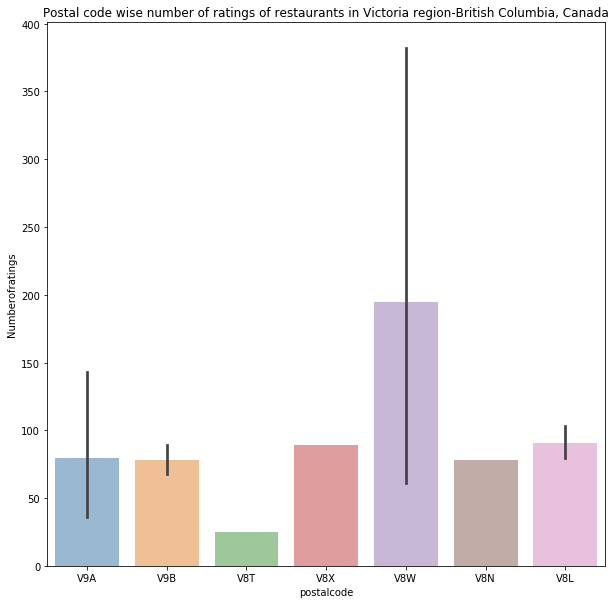

In [126]:
plt.figure(figsize = (10,10))
sns.barplot(y= 'Numberofratings', x= 'postalcode', data = dfVIC, alpha = 0.5)
plt.title('Postal code wise number of ratings of restaurants in Victoria region-British Columbia, Canada')

#comparing these two graphs, 'V8T' has highest rating of approximately 4.5, but it is rated but just around 20 people, which makes the ratings not reliable
#Rating for V8W restaurants is much realiable as it is rated by around 190 people

# Exploring Toronto Restaurants

In [159]:
dfTOR.head()

,restaurant,postalcode,Ratings,Extra,Numberofratings,Latitude,Longitude
0,Old Mill Toronto Dining Room,M8X,5.0,The Old Mill Toronto hotel provides elegant lu...,0,43.653654,-79.506944
1,Bardi's Steak House,M5J,4.0,"Since 1966, Exceptional Dining, Certified Angu...",172,43.640816,-79.381752
2,Ki Restaurant & Lounge,M5J,4.5,"Dishes are meant to be shared, with a sensatio...",513,43.640816,-79.381752
3,Harbour 60 Toronto,M5J,3.5,Harbour Sixty Steak House Our Landmarks restau...,632,43.640816,-79.381752
4,The Bottom Line Restaurant & Bar,M5J,4.0,"Described as a classy sports bar, the financia...",75,43.640816,-79.381752


Text(0.5, 1.0, 'Postal code wise ratings of restaurants in Victoria region-British Columbia, Canada')

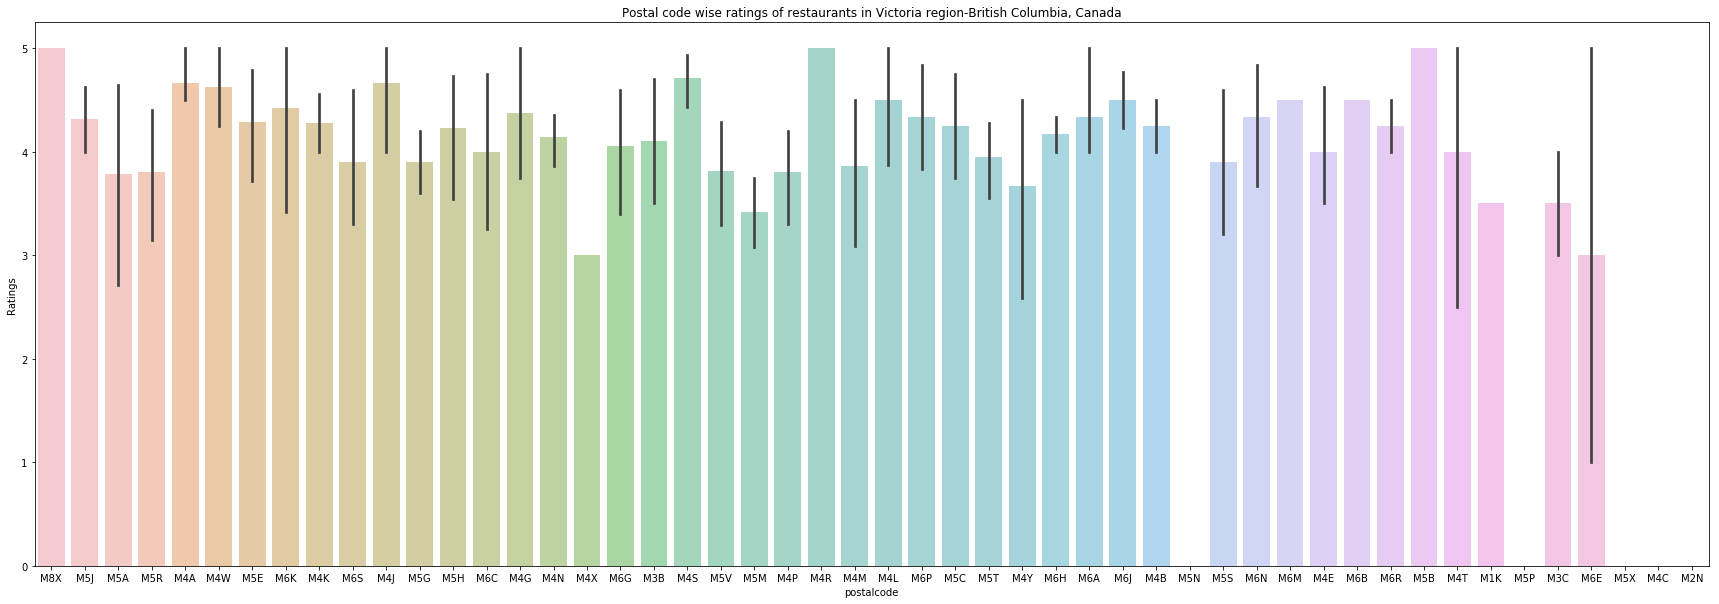

In [150]:
plt.figure(figsize = (30,10))
sns.barplot(y= 'Ratings', x= 'postalcode', data = dfTOR, alpha = 0.5)
plt.title('Postal code wise ratings of restaurants in Toronto, Canada')

Text(0.5, 1.0, 'Postal code wise number of ratings of restaurants in Toronto, Canada')

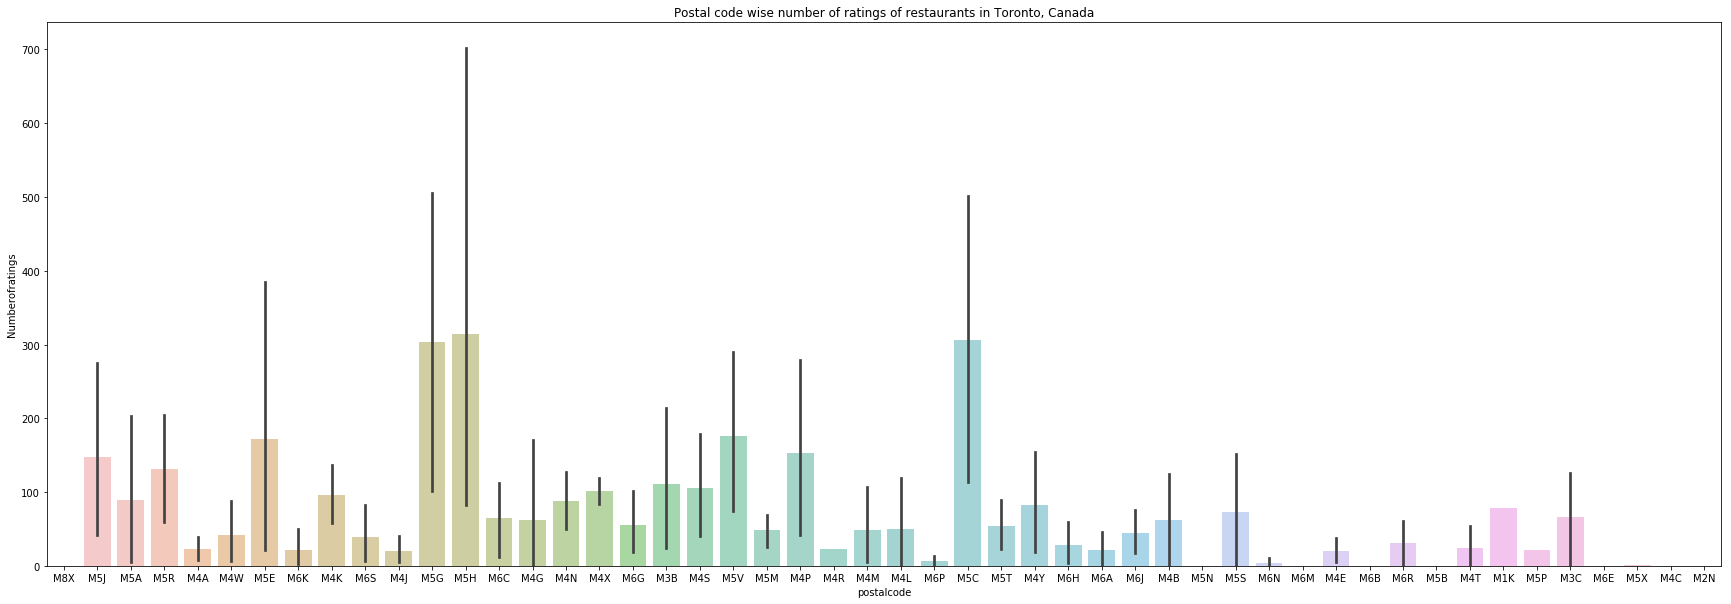

In [151]:
plt.figure(figsize = (30,10))
sns.barplot(y= 'Numberofratings', x= 'postalcode', data = dfTOR, alpha = 0.5)
plt.title('Postal code wise number of ratings of restaurants in Toronto, Canada')

#M5H, M5G, M5C are clearly having more ratings and , more number of people have voted for them, which makes sense as people are more likely to visit them and rate them

# Plotting maps

In [166]:
import folium
# create map of Bristish columbia (BC) using latitude and longitude values
map_BC = folium.Map(location=[lat, long], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dfVIC['lat'], dfVIC['long'], dfVIC['restaurant']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BC)  
    
map_BC

In [193]:
a = dfTOR['postalcode']
nomi = pgeocode.Nominatim('ca')
for x in a:
    location = nomi.query_postal_code(x)
    lat1 = location.latitude
    long1 = location.longitude

In [197]:
import folium
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[lat1, long1], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dfTOR['Latitude'], dfTOR['Longitude'], dfTOR['restaurant']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

In [ ]:
# We can see , there are large number of restaurants in Toronto as compared to British Columbia (BC).  OPening a restaurant in BC willbe more profitable. Also the data is scraped from yello pages, it seems to have less 
# information for BC restaurants. More data is needed for analysis.

# BC has more restaurants concentrated in fewer postal codes, the representation is due to the fact that total area under BC is far greater than Toronto

In [ ]:
#Opening an Indian Restaurant in British Columbia

In [200]:
dfVIC.head()

,restaurant,postalcode,Ratings,Numberofratings,lat,long
0,Wing's Restaurant,V9A,2.0,36,48.4496,-123.4193
1,Ilgreco Pizzaria,V9A,3.5,143,48.4496,-123.4193
2,Lum's Chinese Restaurant,V9A,3.5,60,48.4496,-123.4193
3,Mad Greeks Pizzza,V9B,4.0,89,48.4793,-123.5271
4,May Gold Village,V9B,4.0,57,48.4793,-123.5271


# Neighbothood analysis for V8T postal code

In [ ]:
#for BC, postal code- V8T is having least number of ratings, it might be possible that the particular area has lesser number of restaurants

In [217]:
dfVICgpd = dfVIC.groupby('postalcode').sum()

In [237]:
dfVIC.loc[dfVIC['postalcode'] == 'V8T']

,restaurant,postalcode,Ratings,Numberofratings,lat,long
6,Young's Restaurant,V8T,4.5,25,48.4392,-123.3566


In [ ]:
#lets explore the area aorund this postal code

In [229]:
CLIENT_ID = '01AE3FIBBA01ZXUY4UVCTRDUQFUJH0NSSWNFYJAGUKQYWA32'
CLIENT_SECRET = 'CO3IAZBMXHGJ54CHVK2XFYKLB3FJZCNJCM3SCHAPX5LSVNYK'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 01AE3FIBBA01ZXUY4UVCTRDUQFUJH0NSSWNFYJAGUKQYWA32
CLIENT_SECRET:CO3IAZBMXHGJ54CHVK2XFYKLB3FJZCNJCM3SCHAPX5LSVNYK


In [241]:
LIMIT = 100 
radius = 500
neighborhood_latitude = dfVIC.loc[6, 'lat']
neighborhood_longitude = dfVIC.loc[6, 'long']

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=01AE3FIBBA01ZXUY4UVCTRDUQFUJH0NSSWNFYJAGUKQYWA32&client_secret=CO3IAZBMXHGJ54CHVK2XFYKLB3FJZCNJCM3SCHAPX5LSVNYK&v=20180605&ll=48.4392,-123.3566&radius=500&limit=100'

In [242]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f136717f5887b50513f504b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hillside - Quadra',
  'headerFullLocation': 'Hillside - Quadra, Victoria',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 48.4437000045, 'lng': -123.34982956778404},
   'sw': {'lat': 48.4346999955, 'lng': -123.36337043221596}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '541decf5498e78ca088ac3b0',
       'name': 'Part and Parcel',
       'location': {'address': '2656 Quadra St',
        'crossStreet': 'near Hillside Ave',
        'lat': 48.439102,
        'lng': -123.359291,
        'labeledLatLngs': [{'label'

In [243]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [244]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Part and Parcel,Restaurant,48.439102,-123.359291
1,Caffe Fantastico,Café,48.437505,-123.358946
2,5th Street Bar & Wood Fired Grill,Bar,48.439694,-123.358110
3,Cascadia Liquor,Liquor Store,48.438432,-123.358237
4,Fairway Market,Grocery Store,48.438147,-123.358093


In [245]:
(nearby_venues['categories'] == 'Restaurant').sum()

1

In [ ]:
# In 500 m radius of the postal code selected , there is only one restaurant - 'Part and Parcel', which suggests that this area can  be further explored

# NLP analysis of restaurant column for British columbia

In [250]:
dfVIC.head(2)

,restaurant,postalcode,Ratings,Numberofratings,lat,long
0,Wing's Restaurant,V9A,2.0,36,48.4496,-123.4193
1,Ilgreco Pizzaria,V9A,3.5,143,48.4496,-123.4193


In [256]:
def gen_fre(restaurant):    
    a =[]
    for t in restaurant.split():
            a.extend(t)
    word_freq= pd.Series(a).value_counts()
#     word_freq[:20]
    return word_freq

gen_fre(dfVIC.restaurant.str)

Restaurant    54
Chinese       12
Maria's       10
Taste         10
Souvlaki      10
Harbour       10
Good          10
Sidney        10
Tokyo         10
Fortune       10
Corner        10
Greek         10
Thai          10
of            10
Cafe          10
Woodshed      10
Homestead     10
Boondocks     10
Jammer         1
Pizzza         1
Young's        1
Mad            1
Sampan         1
Dutch          1
Sushi          1
Smuggler's     1
Cove           1
Mikes          1
The            1
Bakery         1
Itami          1
Casual         1
Diner          1
Village        1
Steakhouse     1
Ilgreco        1
Greeks         1
Pizzaria       1
Gold           1
Mr             1
Pub            1
May            1
Lum's          1
Spice          1
Ltd            1
Seafood        1
&              1
Wing's         1
dtype: int64

In [258]:
!pip install wordcloud

     |████████████████████████████████| 368kB 8.2MB/s eta 0:00:01


In [259]:
from wordcloud import WordCloud

In [260]:
#Generate word frequencies
word_freq = gen_fre(dfVIC.restaurant.str)

In [263]:
#Generate word cloud
wc= WordCloud(height=330, max_words=1000, background_color='black').generate_from_frequencies(word_freq)

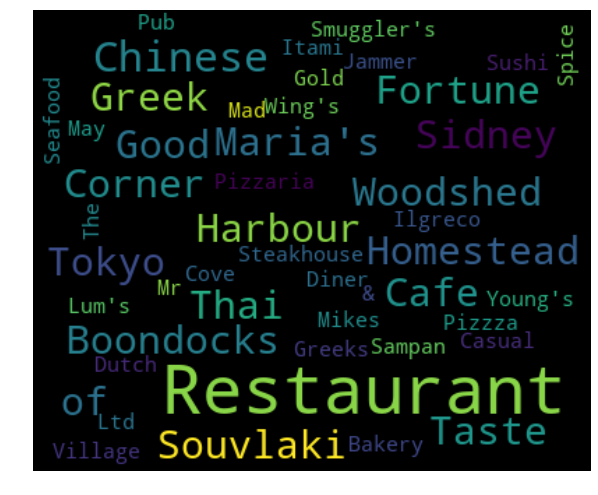

In [264]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [265]:
import re

In [279]:
def clean_text(restaurant):
    restaurant = re.sub(r'Restaurant', '', restaurant)
    restaurant = re.sub(r'restaurant', '', restaurant)
    restaurant = re.sub(r'Village', '', restaurant)
    restaurant = re.sub(r'Mr', '', restaurant)
    restaurant = re.sub(r'ltd', '', restaurant)
    restaurant = re.sub(r'taste', '', restaurant)
     
    #Remove punctuations
    restaurant = re.sub(r'[?!.;:,#@-]', '', restaurant)

    #Convert to lowercase to maintain consistency
    restaurant = restaurant.lower()
    return restaurant

In [267]:
from wordcloud import STOPWORDS

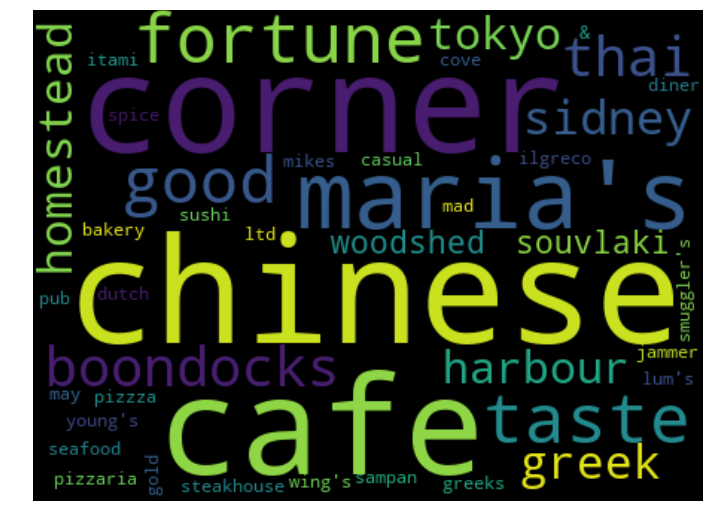

In [280]:
restaurant = dfVIC.restaurant.apply(lambda x: clean_text(x))
word_freq = gen_fre(restaurant.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=500, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# Above word map also suggests that most of the restaurants in thispostal code V8T are chinese or italian, therefore opening an INDIAN restaurant can give a highly competititve business edge